In [3]:
# set up

# python >= 3.5 is required
import sys
assert sys.version_info >= (3,5)

# scikit learn >= 0.20 is required
import sklearn
assert sklearn.__version__ >= '0.20'

# common import
import pandas as pd
import numpy as np
import os

# make the notebook stable accros runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# save the result of figure
PROJECT_ROOT_DIR = ''
CHAPTER_ID = 'Ensambles'
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR,'Images',CHAPTER_ID)
os.makedirs(IMAGES_PATH,exist_ok=True)

def save_fig(fig_id,tight_layout=True, fig_extension='png',resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + '.' + fig_extension)
    print('Saving Figure',fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path,format=fig_extension,resolution=resolution)

# Voting Classifier

In [8]:
heads_proba = 0.51 #51%
coin_tosses = (np.random.rand(10000,10) < heads_proba).astype(np.int32)
cumulative_heads_ratio = np.cumsum(coin_tosses,axis=0) / np.arange(1,10001).reshape(-1,1)
cumulative_heads_ratio.tolist()

[[1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0],
 [0.5, 0.5, 0.5, 0.5, 0.5, 1.0, 0.5, 1.0, 0.5, 0.5],
 [0.6666666666666666,
  0.6666666666666666,
  0.3333333333333333,
  0.6666666666666666,
  0.3333333333333333,
  1.0,
  0.3333333333333333,
  0.6666666666666666,
  0.3333333333333333,
  0.3333333333333333],
 [0.75, 0.75, 0.5, 0.5, 0.5, 0.75, 0.25, 0.75, 0.25, 0.5],
 [0.6, 0.6, 0.4, 0.6, 0.4, 0.6, 0.4, 0.6, 0.4, 0.4],
 [0.5,
  0.6666666666666666,
  0.5,
  0.5,
  0.5,
  0.5,
  0.3333333333333333,
  0.6666666666666666,
  0.5,
  0.3333333333333333],
 [0.42857142857142855,
  0.7142857142857143,
  0.42857142857142855,
  0.5714285714285714,
  0.5714285714285714,
  0.42857142857142855,
  0.2857142857142857,
  0.7142857142857143,
  0.5714285714285714,
  0.2857142857142857],
 [0.375, 0.75, 0.375, 0.5, 0.5, 0.375, 0.375, 0.625, 0.5, 0.375],
 [0.3333333333333333,
  0.7777777777777778,
  0.4444444444444444,
  0.5555555555555556,
  0.4444444444444444,
  0.3333333333333333,
  0.3333333333333333,
 

In [5]:
coin_tosses

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 1, 1],
       [0, 1, 1, ..., 0, 0, 1],
       ...,
       [1, 1, 0, ..., 1, 1, 0],
       [0, 0, 1, ..., 1, 1, 1],
       [0, 1, 0, ..., 0, 1, 1]])

Saving Figure law_of_large_numbers_plot


C:\Users\User\AppData\Local\Temp\ipykernel_5392\617383281.py:38: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "resolution" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(path,format=fig_extension,resolution=resolution)


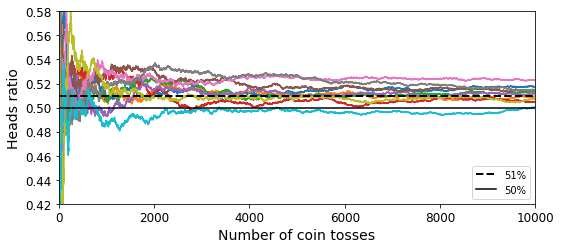

In [9]:
plt.figure(figsize=(8,3.5))
plt.plot(cumulative_heads_ratio)
plt.plot([0, 10000], [0.51, 0.51], "k--", linewidth=2, label="51%")
plt.plot([0, 10000], [0.5, 0.5], "k-", label="50%")
plt.xlabel("Number of coin tosses")
plt.ylabel("Heads ratio")
plt.legend(loc="lower right")
plt.axis([0, 10000, 0.42, 0.58])
save_fig("law_of_large_numbers_plot")
plt.show()